# Load Libraries and data

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
/kaggle/input/uber-ride-analytics-dashboard/Dasboard.gif
/kaggle/input/uber-ride-analytics-dashboard/Uber.pbix


In [6]:
data = pd.read_csv("/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv")
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


# Data Overview

In [7]:
data.shape

(150000, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [9]:
data.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [10]:
data.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.columns.to_list()

['Date',
 'Time',
 'Booking ID',
 'Booking Status',
 'Customer ID',
 'Vehicle Type',
 'Pickup Location',
 'Drop Location',
 'Avg VTAT',
 'Avg CTAT',
 'Cancelled Rides by Customer',
 'Reason for cancelling by Customer',
 'Cancelled Rides by Driver',
 'Driver Cancellation Reason',
 'Incomplete Rides',
 'Incomplete Rides Reason',
 'Booking Value',
 'Ride Distance',
 'Driver Ratings',
 'Customer Rating',
 'Payment Method']

In [13]:
data.dtypes

Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

# EDA

In [16]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time

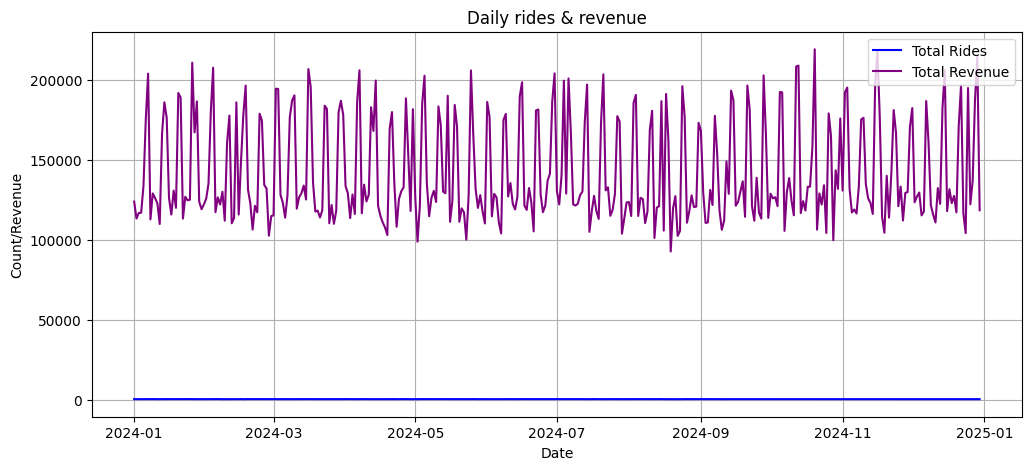

In [19]:
daily_status = data.groupby('Date').agg({'Booking ID':'count', 'Booking Value':'sum'}).reset_index()
plt.figure(figsize=(12,5))
plt.plot(daily_status['Date'], daily_status['Booking ID'], label="Total Rides", color="blue")
plt.plot(daily_status['Date'], daily_status['Booking Value'], label='Total Revenue', color='purple')
plt.title('Daily rides & revenue')
plt.xlabel('Date')
plt.ylabel('Count/Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
daily_status.head()

,Date,Booking ID,Booking Value
0,2024-01-01,414,124057.0
1,2024-01-02,389,113427.0
2,2024-01-03,384,116982.0
3,2024-01-04,414,117045.0
4,2024-01-05,416,133692.0


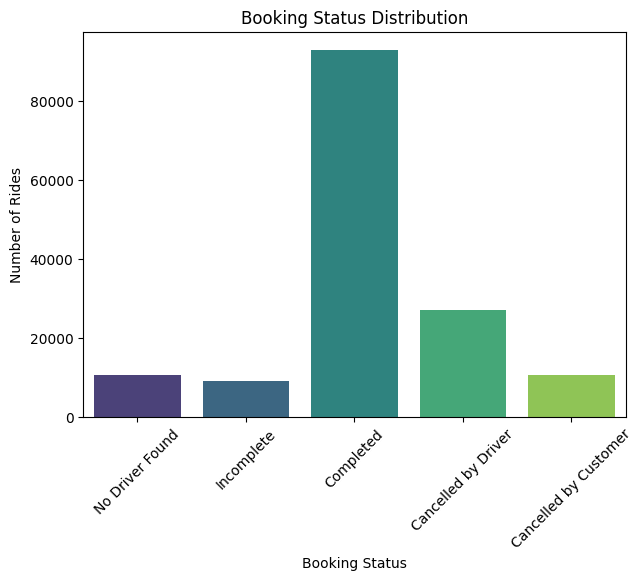

In [22]:
#Booking status
plt.figure(figsize=(7,5))
sns.countplot(x='Booking Status', data= data, palette='viridis')
plt.title('Booking Status Distribution')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

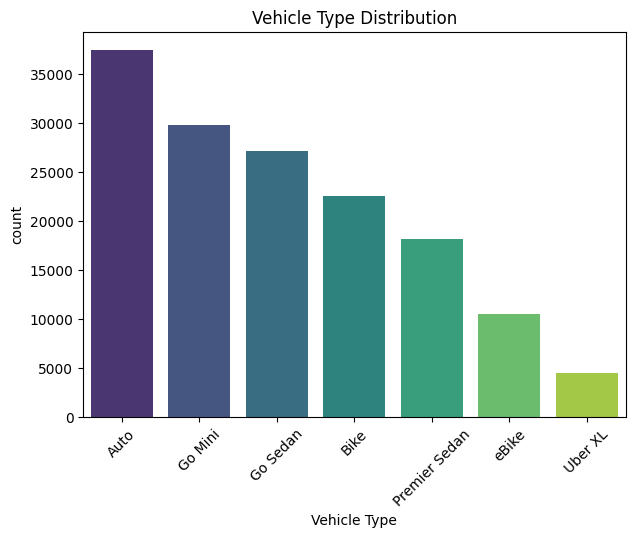

In [23]:
# Vehicle Type Usage
plt.figure(figsize=(7,5))
sns.countplot(x='Vehicle Type', data=data, order=data['Vehicle Type'].value_counts().index, palette='viridis')
plt.title('Vehicle Type Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
cols= ["Avg VTAT","Avg CTAT","Cancelled Rides by Customer",
       'Cancelled Rides by Driver',	'Incomplete Rides','Booking Value','Ride Distance',
       'Driver Ratings',	Customer Rating]